In [48]:
import numpy as np

import pandas as pd
from pandasql import sqldf

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import colorlover as cl
from plotly.offline import (download_plotlyjs,
                            init_notebook_mode,
                            plot, iplot)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
import mpl_toolkits

In [4]:
oly_evts = pd.read_csv('dataset/athlete_events.csv')
oly_rgn = pd.read_csv('dataset/noc_regions.csv')

In [3]:
oly_evts

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
oly_evts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
print(oly_evts.shape)
print(oly_rgn.shape)

(271116, 15)
(230, 3)


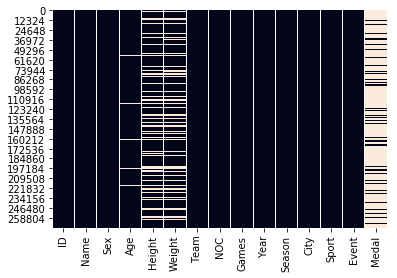

In [9]:
# visualizing missing data
sns.heatmap(oly_evts.isnull(), cbar=False)

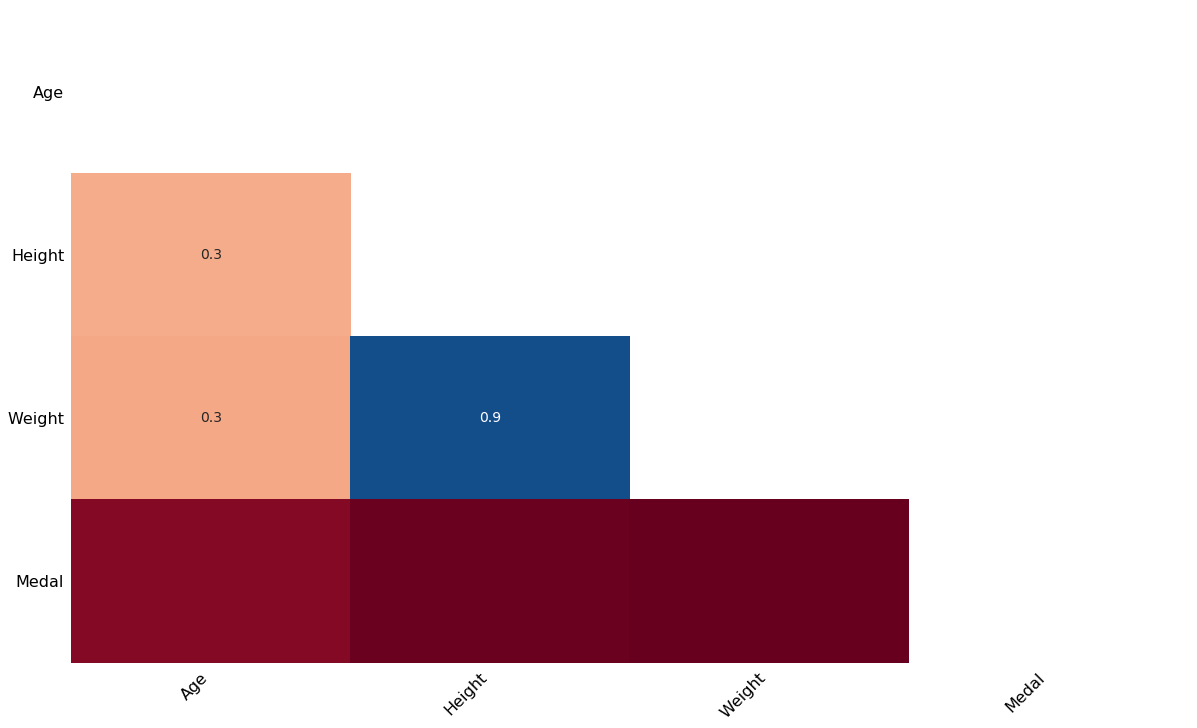

In [11]:
# missing value correlation
import missingno as msno
msno.heatmap(oly_evts)

In [12]:
# imputing missing values
imp_col = ['Age', 'Height', 'Weight']
for col in imp_col:
    oly_evts[col] = oly_evts[col].fillna(np.mean(oly_evts[col]))
    oly_evts[col] = np.round(oly_evts[col], 1)

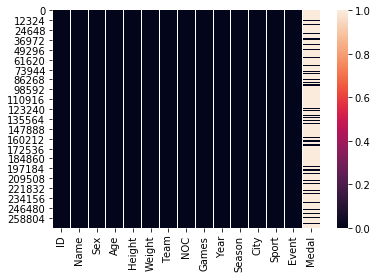

In [15]:
sns.heatmap(oly_evts.isnull())

In [18]:
# male vs female participation -- 1896-2016
m_vs_f_120 = """select Year, Sex, count(distinct Name) cnt from
oly_evts group by Year, Sex"""
pysqldf = lambda m_vs_f: sqldf(m_vs_f, globals())
mvf_120_df = pysqldf(m_vs_f_120)

m_120_df = mvf_120_df[mvf_120_df.Sex=='M']
f_120_df = mvf_120_df[mvf_120_df.Sex=='F']

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import (download_plotlyjs,
                            init_notebook_mode, plot,
                            iplot)
init_notebook_mode(connected=True)

In [21]:
m_120_t = go.Bar(
    x=m_120_df.Year,
    y=m_120_df.cnt,
    name='Male'
)

f_120_t = go.Bar(
    x=f_120_df.Year,
    y=f_120_df.cnt,
    name='Female'
)

data =[m_120_t, f_120_t]
layout = go.Layout(
    barmode='stack',
    xaxis=dict(type='category', title='Year'),
    yaxis=dict(title='Count of Players'),
    title='Male vs Female Participation in Olymipic from the year 1896-2016'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stack-bar')

In [24]:
na_120 = """select Year, count(distinct NOC) cnt from
oly_evts group by Year"""
pysqldf = lambda m_v_f:sqldf(na_120, globals())
na_120_df = pysqldf(na_120)

In [27]:
na_120_t = go.Bar(
    x=na_120_df.Year,
    y=na_120_df.cnt,
    marker=dict(
        color='rgb(163,132,193)',
        line=dict(
            color='rgb(239,234,244)',
            width=2
        )
    )
)

data = [na_120_t]
layout = go.Layout(
    barmode='stack',
    xaxis=dict(type='category', title='Year'),
    yaxis=dict(title='Count of Nations'),
    title='Nations participating in Olympic from the year 1896-2016'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stack-bar')

In [29]:
Medals_120 = """select Year, Sex, Medal, count(Medal) cnt
from oly_evts group by Year, Sex, Medal"""
pysqldf = lambda m_v_f: sqldf(Medals_120, globals())
Medals_120_df = pysqldf(Medals_120)
na_key = Medals_120_df["Medal"].isnull()
Medals_120_df_final = Medals_120_df.loc[~na_key]

In [31]:
medal_t = ff.create_facet_grid(
    Medals_120_df_final,
    x='Year',
    y='cnt',
    color_name='Medal',
    facet_row='Medal',
    facet_col='Sex',
    show_boxes=False,
    colormap={'Gold':'rgb(218,165,32)',
              'Silver':'rgb(211,211,211)',
              'Bronze':'rgb(128,64,0)'
             }
)

medal_t.layout.update({'title':'Male Vs Female winning medals in Olympics \
                       from the year 1896-2016'})

iplot(medal_t, filename='Male vs Female winning medals in Olympic from \
                        the year 1896-2016')

In [32]:
loc_120 = """select distinct Year, Season,
City, count(distinct Sport) cnt from oly_evts
group by Year, Season, City"""
pysqldf = lambda m_v_f: sqldf(loc_120, globals())
loc_120_df = pysqldf(loc_120)

In [33]:
# summer olympics
sum_df = loc_120_df[loc_120_df.Season=='Summer']
# winter olympics
win_df = loc_120_df[loc_120_df.Season=='Winter']

In [35]:
# Location Details of Cities
loc_det = pd.DataFrame({
    'City':['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary', 'Albertville',
           'Lillehammer', 'Los Angeles', 'Salt Lake City', 'Helsinki', 'Lake Placid',
           'Sydney', 'Atlanta', 'Stockholm', 'Sochi', 'Nagano', 'Torino', 'Beijing',
           'Rio de Janeiro', 'Athina', 'Squaw Valley', 'Innsbruck', 'Sarajevo',
           'Mexico City', 'Munich', 'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo",
           'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
           'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz', 'Garmisch-Partenkirchen'],
    'lat':[41.38, 51.50, 51.22, 48.85, 51.04, 34.26, 61.115, 34.05, 40.76,
          60.16, 27.29, -33.86, 33.74, 59.32, 43.58, 36.65, 45.06, 39.90,
          -22.911, 37.97, 36.72, 47.26, 43.85, 19.43, 48.13, 37.56, 52.52, 
          59.91, 46.53, -37.81, 41.89, 52.37, 45.50, 44.81, 35.65, 49.26,
          45.18, 43.01, 45.92, 38.63, 46.49, 47.5],
    'lon':[2.173, -0.12, 4.39, 2.35, -114.07, -86.20, 10.46, -118.24, -111.89,
          24.93, -81.36, 151.20, -84.38, 18.06, 39.72, 138.18, 7.68, 116.40,
          -43.2094, 23.73, -119.23, 11.39, 18.41, -99.13, 11.58, 126.97, 13.40,
          10.75, 12.13, 144.96, 12.48, 4.9, -73.55, 20.46, 139.74, -123.11,
          5.72, 141.40, 6.86, -90.19, 9.83, 11.08],
})

In [36]:
# mergins summer and winter dataset with loc_det
sum_df = pd.merge(sum_df, loc_det, on='City')
win_df = pd.merge(win_df, loc_det, on='City')

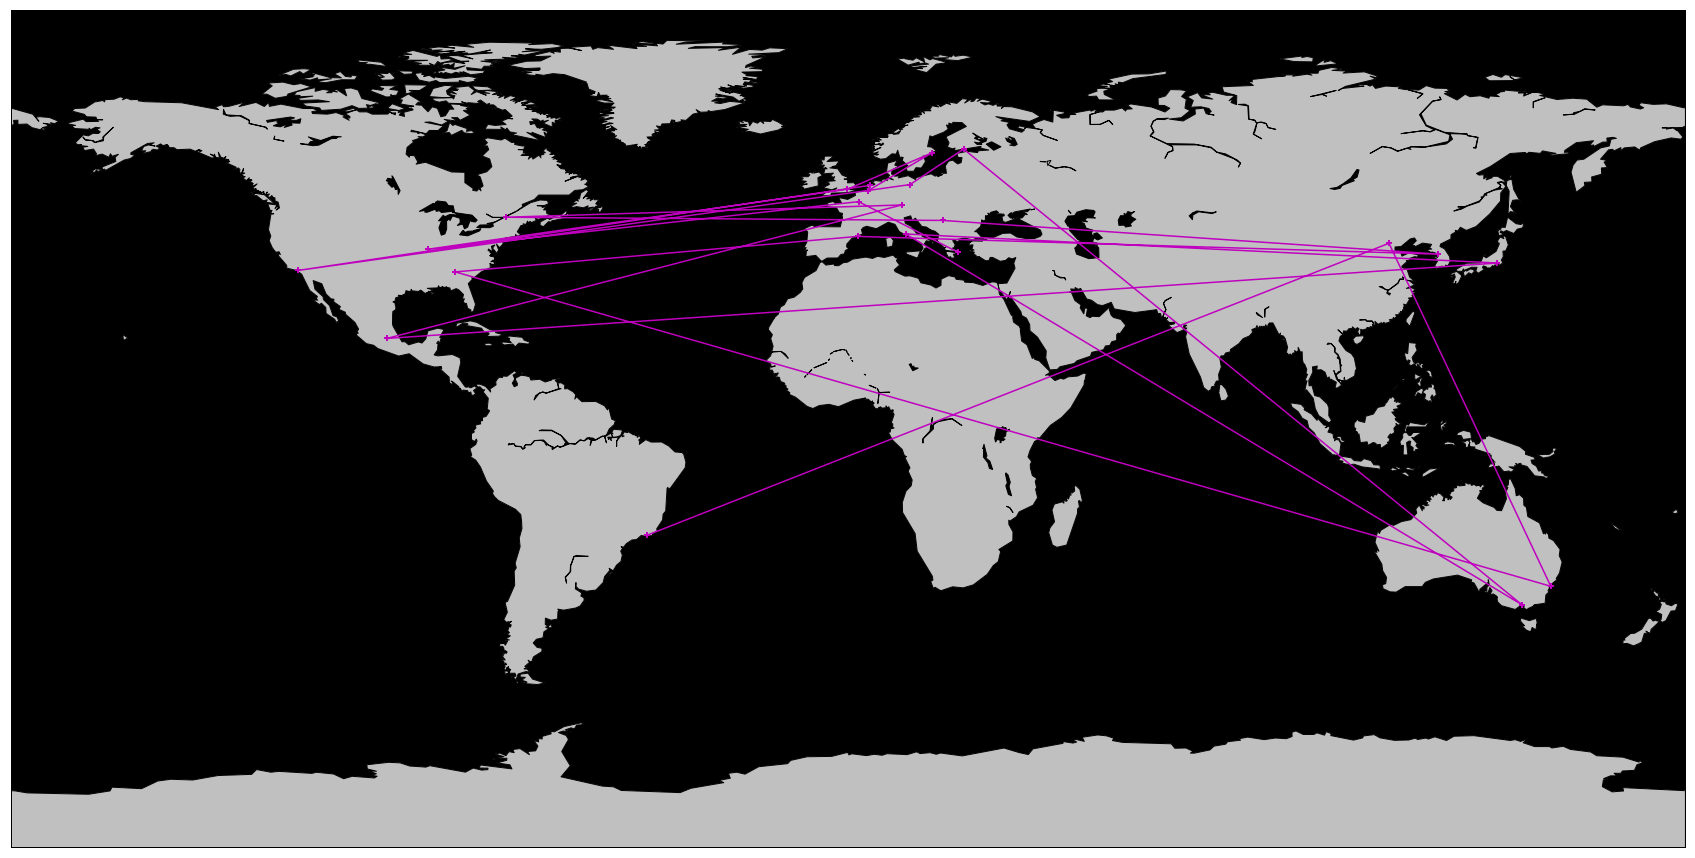

In [51]:
plt.figure(figsize=(30, 17))

map = Basemap()
map.drawcoastlines()
map.drawcounties()
map.fillcontinents()
map.drawmapboundary()

map.drawmapboundary(fill_color='k')
map.fillcontinents(color='silver', lake_color='k')

lons = pd.np.array(sum_df['lon'])
lats = pd.np.array(sum_df['lat'])

x,y = map(lons, lats)

map.plot(x, y, marker='+', color='m',
         markersize=6, markeredgewidth=2)

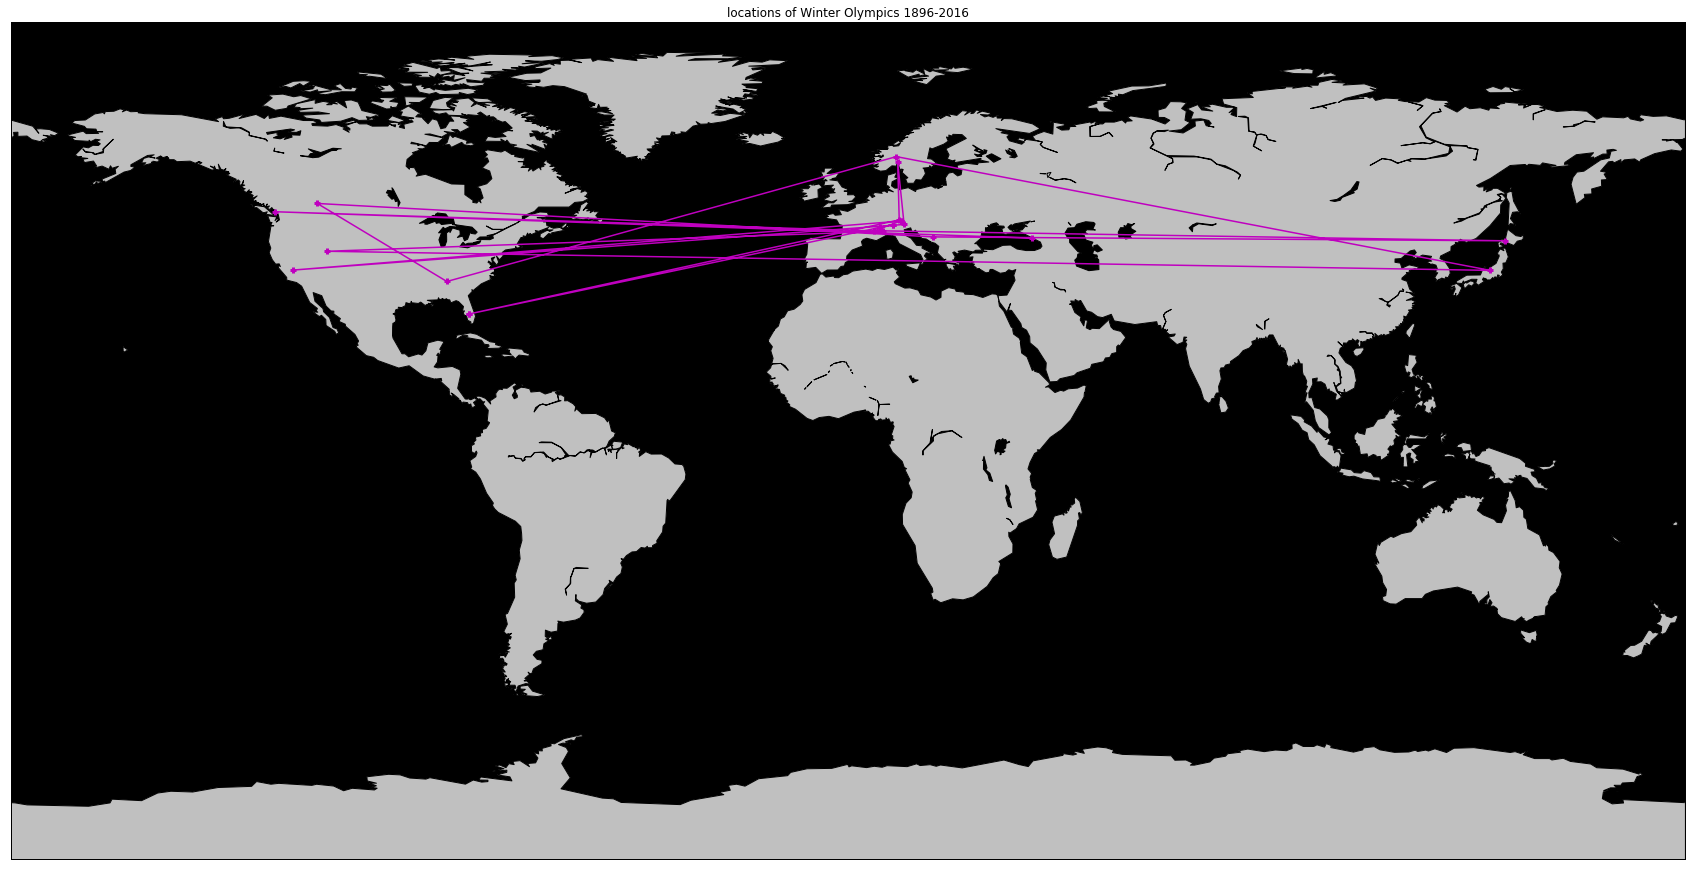

In [63]:
plt.figure(figsize=(30, 17))

map = Basemap()
map.drawcoastlines()
map.drawcounties()
map.fillcontinents()
map.drawmapboundary()

map.drawmapboundary(fill_color='k')
map.fillcontinents(color='silver', lake_color='k')

lons = pd.np.array(win_df['lon'])
lats = pd.np.array(win_df['lat'])

x,y = map(lons, lats)

map.plot(x, y, marker='+', color='m',
         markersize=6, markeredgewidth=3)
plt.title("locations of Winter Olympics 1896-2016")
plt.show()